# Basic Logo Recognition using OpenCV and SIFT

Welcome to the "Basic Logo Recognition using OpenCV and SIFT" notebook! In this project, we'll explore how to recognize logos or images within other images using OpenCV and the Scale-Invariant Feature Transform (SIFT) algorithm.

## Project Overview

- **Objective**: Our goal is to build a basic logo recognition system that can detect logos or images of interest in a given set of images.

- **Key Components**: We'll use OpenCV, a powerful computer vision library, to perform image processing and feature detection. Specifically, we'll use the SIFT algorithm to extract distinctive features from the images and match them to a reference logo or image.

- **Implementation**: The project is divided into several steps, including loading images, converting them to grayscale, extracting SIFT features, and matching these features to identify logos.

## Notebook Sections

This notebook is organized into the following sections:

1. **Import Necessary Libraries**: We'll start by importing the required libraries and setting up the environment.

2. **Load and Display Images**: We'll load sample images from a dataset and display them.

3. **SIFT Feature Extraction**: We'll use the SIFT algorithm to extract features from the images.

4. **Logo Matching**: We'll implement logo matching by comparing SIFT features between images.

5. **Visualization**: We'll visualize the matches and display the results.

## Getting Started

Before we begin, make sure you have the necessary libraries installed. You can install OpenCV using the following command:

!pip install opencv-python

In [13]:
# Import necessary libraries
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from pathlib import Path
import os
import time
from operator import itemgetter

In [14]:
# Mount Google Drive to access files (assuming it's not already mounted)
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Define a function to display an RGB image using matplotlib
def show_rgb_img(img):
    return plt.imshow(cv.cvtColor(img, cv.CV_32S))

In [16]:
# Define a function to convert a color image to grayscale
def to_gray(color_img):
    gray = cv.cvtColor(color_img, cv.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap='gray')
    return gray

array([[96, 96, 96, ..., 96, 96, 96],
       [96, 96, 96, ..., 96, 96, 96],
       [96, 96, 96, ..., 96, 96, 96],
       ...,
       [96, 96, 96, ..., 96, 96, 96],
       [96, 96, 96, ..., 96, 96, 96],
       [96, 96, 96, ..., 96, 96, 96]], dtype=uint8)

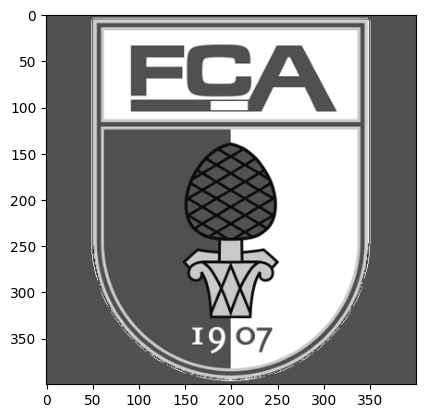

In [17]:
# Convert a loaded image to grayscale and display it
img=cv.imread('/content/drive/MyDrive/top-5-football-leagues/bundesliga/augsburg.png')
to_gray(img)

In [18]:
def gen_sift_features(gray_img):
    # Create a SIFT detector
    sift = cv.xfeatures2d.SIFT_create()
    # Detect keypoints (kp) and compute SIFT descriptors (desc)
    # desc is the SIFT descriptors, they're 128-dimensional vectors that we can use for our final features
    kp, desc = sift.detectAndCompute(gray_img, None)
    return kp, desc

In [19]:
# Define a function to display SIFT features on an image
def show_sift_features(gray_img, color_img, kp):
    return plt.imshow(cv.drawKeypoints(gray_img, kp, color_img.copy()))

# You can use this function to display SIFT features on your grayscale image
# show_sift_features(to_gray(img), img, kp)

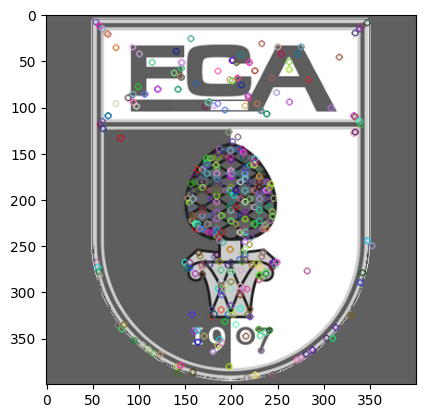

In [20]:
img_kp, img_desc = gen_sift_features(to_gray(img))

show_sift_features(to_gray(img), img, img_kp)

In [21]:
# Define a function to retrieve a list of file paths and names from top 5 football leagues logo database
def file_from_fbleague():
    parents= '/content/drive/MyDrive/top-5-football-leagues'
    file_list=[]
    p = Path(parents)

    for x in p.iterdir():
        if os.path.isdir(x):
            for y in x.iterdir():
                if os.path.isfile(y) and "png" in str(y):
                    name= os.path.basename(y)
                    file_list.append((name, str(y)))
    return(file_list)

In [22]:
# Call the function to retrieve the list of files
file_list=file_from_fbleague()
print(file_list)

[('hannover.png', '/content/drive/MyDrive/top-5-football-leagues/bundesliga/hannover.png'), ('hoffenheim.png', '/content/drive/MyDrive/top-5-football-leagues/bundesliga/hoffenheim.png'), ('furth.png', '/content/drive/MyDrive/top-5-football-leagues/bundesliga/furth.png'), ('moenchengladbach.png', '/content/drive/MyDrive/top-5-football-leagues/bundesliga/moenchengladbach.png'), ('hertha-bsc-berlin.png', '/content/drive/MyDrive/top-5-football-leagues/bundesliga/hertha-bsc-berlin.png'), ('leverkusen.png', '/content/drive/MyDrive/top-5-football-leagues/bundesliga/leverkusen.png'), ('dusseldorf.png', '/content/drive/MyDrive/top-5-football-leagues/bundesliga/dusseldorf.png'), ('freiburg.png', '/content/drive/MyDrive/top-5-football-leagues/bundesliga/freiburg.png'), ('stuttgart.png', '/content/drive/MyDrive/top-5-football-leagues/bundesliga/stuttgart.png'), ('bayern.png', '/content/drive/MyDrive/top-5-football-leagues/bundesliga/bayern.png'), ('frankfurt.png', '/content/drive/MyDrive/top-5-foo

In [23]:
# Define a function to display an image
def show_image(img):
    cv2_imshow(img)

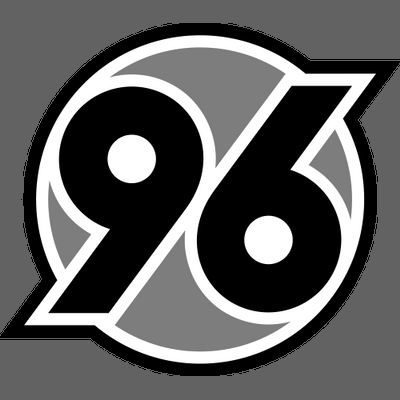

In [24]:
# Load and display the first image from the list
img1 = cv.imread(file_list[0][1], cv.IMREAD_GRAYSCALE)
show_image(img1)

In [25]:
# Initialize the SIFT (Scale-Invariant Feature Transform) detector
sift = cv.SIFT_create()

In [26]:
desc=[]
# Loop through the list of images
for i in range(len(file_list)):
    name = file_list[i][0]

    # Read and resize the image
    img01 = cv.imread(str(file_list[i][1]), cv.IMREAD_GRAYSCALE)
    img1 = cv.resize(img01, (150, 150), interpolation=cv.INTER_AREA)

    # Detect and compute SIFT features for the image
    kp1, des1 = sift.detectAndCompute(img1, None)

    # Append image name, SIFT descriptors, keypoints, and resized image to the list
    desc.append([name, des1, kp1, img1])



In [27]:

# Define a function to compare an input image to a database of images using SIFT)
def compare_to_db(url):


  img02 = cv.imread(url,cv.IMREAD_GRAYSCALE)

  img2 = cv.resize(img02, (500, 500), interpolation = cv.INTER_AREA)
  kp2, des2= sift.detectAndCompute(img2,None)
  FLANN_INDEX_KDTREE = 1
  index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
  search_params = dict(checks=50)   # or pass empty dictionary
  flann = cv.FlannBasedMatcher(index_params,search_params)
  name_matches=[]
  for d in desc:

    name=d[0]
    des1= d[1]
    kp1= d[2]
    #print(d[3].shape)
    matcher = cv.DescriptorMatcher_create(cv.DescriptorMatcher_FLANNBASED)
    knn_matches = matcher.knnMatch(des1, des2, 2)
    matches = flann.knnMatch(des1,des2,k=2)

    ratio_thresh = 0.4
    good_matches = []
    for m,n in knn_matches:
        if m.distance < ratio_thresh * n.distance:
            good_matches.append(m)
    #print(len(good_matches))
    name_matches.append((name, len(good_matches)))

    #-- Draw matches
    img_matches = np.empty((max(img2.shape[0], d[3].shape[0] ), d[3].shape[1]+img2.shape[1], 3), dtype=np.uint8)
    cv.drawMatches(d[3], kp1, img2, kp2, good_matches, img_matches, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    #-- Show detected matches
    cv2_imshow( img_matches)

    #time.sleep(0.3)
  # Find the image with the most matches and print its name
  print(max(name_matches,key=itemgetter(1))[0])


In [28]:
#compare_to_db("/content/drive/MyDrive/top-5-football-leagues/téléchargement (3).jpeg")

In [29]:
# Call the compare_to_db function with an example image
# compare_to_db("/content/drive/MyDrive/top-5-football-leagues/téléchargement (3).jpeg")
img1 = cv.imread("/content/drive/MyDrive/top-5-football-leagues/french-ligue1/olympique-lyonnais.png",cv.IMREAD_GRAYSCALE)
kp1, des1= cv.SIFT_create().detectAndCompute(img1,None)
img2 = cv.imread("/content/drive/MyDrive/top-5-football-leagues/french-ligue1/fc-lorient.png" ,cv.IMREAD_GRAYSCALE)
kp2, des2= sift.detectAndCompute(img2,None)

In [30]:
# Initialize a FLANN-based matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)

In [31]:
# Find and print matches between SIFT descriptors
matches = flann.knnMatch(des1,des2,k=2)
print("Matches using FLANN:")
print(matches[1])

Matches using FLANN:
(< cv2.DMatch 0x7ddcb01d0a50>, < cv2.DMatch 0x7ddcb01d0970>)


In [32]:
# Alternatively, use the SIFT descriptor matcher
matcher = cv.DescriptorMatcher_create(cv.DescriptorMatcher_FLANNBASED)
knn_matches = matcher.knnMatch(des1, des2, 2)
print("Matches using SIFT Descriptor Matcher:")
print(knn_matches[1])

Matches using SIFT Descriptor Matcher:
(< cv2.DMatch 0x7ddca876d2f0>, < cv2.DMatch 0x7ddca876d390>)


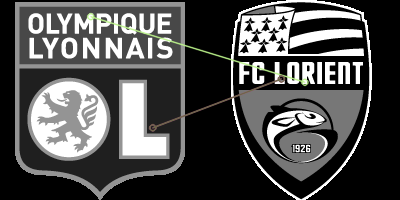

In [33]:
# Filter matches based on a ratio threshold
ratio_thresh = 0.7
good_matches = []
for m,n in knn_matches:
    if m.distance < ratio_thresh * n.distance:
        good_matches.append(m)
#-- Draw matches
img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
cv.drawMatches(img1, kp1, img2, kp2, good_matches, img_matches, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#-- Show detected matches
cv2_imshow( img_matches)
